In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [2]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape images to (28, 28, 1) for CNN input
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255.0

# Convert labels to categorical (One-hot encoding)
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def create_simple_cnn():
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
    model.add(layers.MaxPooling2D((2,2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully Connected Layer
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout for regularization

    # Output Layer (10 classes for digits 0-9)
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [4]:
# Create Simple CNN model
cnn_model = create_simple_cnn()

# Train Model
history = cnn_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.8170 - loss: 0.5794 - val_accuracy: 0.9809 - val_loss: 0.0650
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 48ms/step - accuracy: 0.9707 - loss: 0.1020 - val_accuracy: 0.9854 - val_loss: 0.0495
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 47ms/step - accuracy: 0.9779 - loss: 0.0736 - val_accuracy: 0.9878 - val_loss: 0.0421
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 48ms/step - accuracy: 0.9827 - loss: 0.0570 - val_accuracy: 0.9891 - val_loss: 0.0385
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9852 - loss: 0.0474 - val_accuracy: 0.9894 - val_loss: 0.0404
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.9866 - loss: 0.0425 - val_accuracy: 0.9899 - val_loss: 0.0375
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 47ms/step - accuracy: 0.9884 - loss: 0.0372 - val_accuracy: 0.9897 - val_loss: 0.0392
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - accuracy: 0.9911 - loss: 0.0297 - 

In [5]:
# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


313/313 - 2s - 7ms/step - accuracy: 0.9903 - loss: 0.0325
Test accuracy: 0.9903


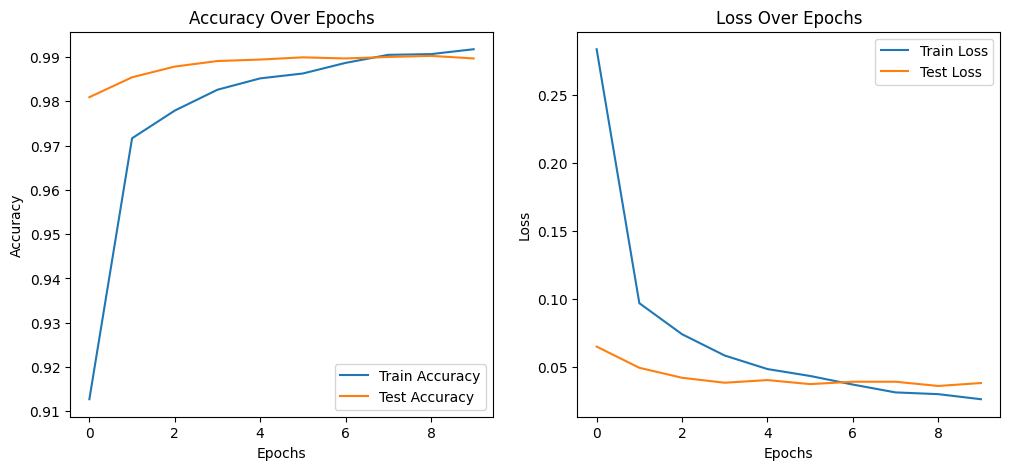

In [6]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()